Chapter 2

In [7]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file_path = "C:\\Users\loyak\hands_on_ml_chapter_2\housing.csv"
file_path

'C:\\Users\\loyak\\hands_on_ml_chapter_2\\housing.csv'

In [9]:
housing_data = pd.read_csv(file_path)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
housing_data.info()     #float64 below means its the decimal and object means its a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

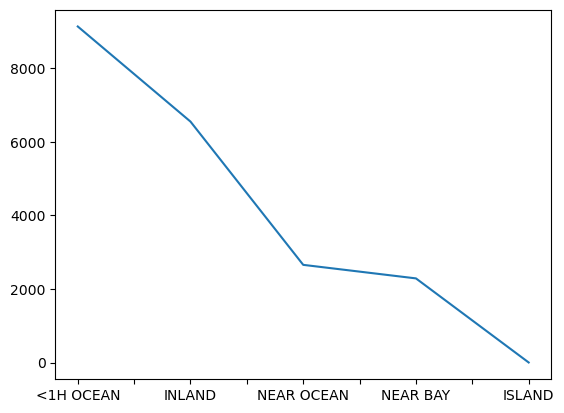

In [12]:
housing_data["ocean_proximity"].value_counts().plot()

<Axes: >

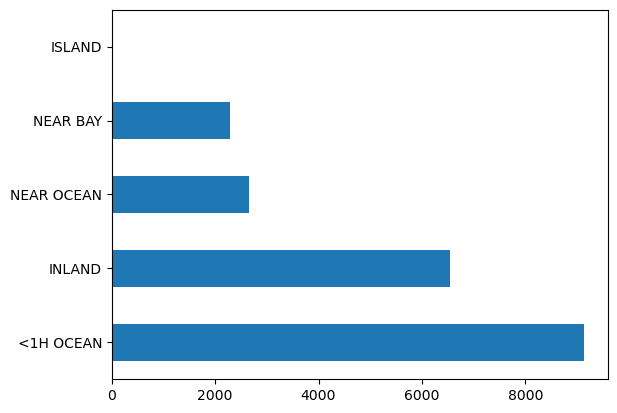

In [13]:
housing_data["ocean_proximity"].value_counts().plot(kind="barh")

In [14]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

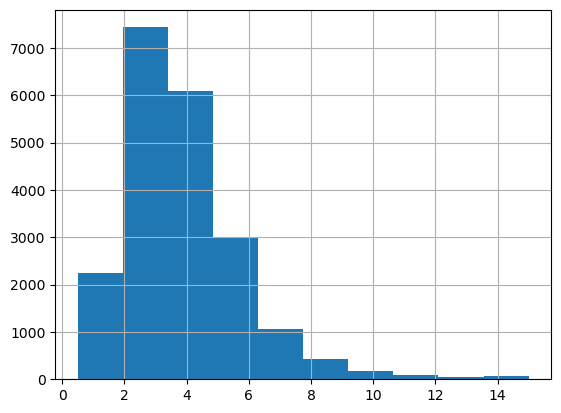

In [15]:
housing_data["median_income"].hist()    #hist is for histogram

In [16]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                    bins=[0.,1.5,3.0,4.5,6., np.inf],
                                    labels=[1,2,3,4,5])
housing_data["income_cat"].value_counts()                      # data below means 822 are between 0 and 1.5; 2362 are between 6 and infinite i.e. the highest value

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

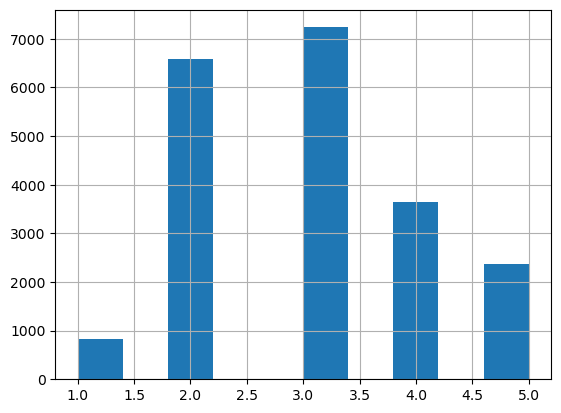

In [17]:
housing_data["income_cat"].hist()

In [18]:
y = housing_data["median_house_value"]
X = housing_data.drop("median_house_value", axis=1)
X                # y i.e. the median_house_value is the data which we are trying to predict so we basically dropped that column and considered other factors

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)   #33% values in testing dataset
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1239,-120.27,38.31,13.0,3297.0,662.0,267.0,97.0,3.0750,INLAND,3
19553,-121.00,37.62,28.0,1153.0,420.0,1043.0,357.0,1.0801,INLAND,1
580,-122.07,37.71,36.0,2879.0,480.0,1235.0,455.0,4.9801,NEAR BAY,4
1795,-122.34,37.93,30.0,2515.0,481.0,1327.0,428.0,2.1287,NEAR BAY,2
16517,-121.21,37.80,31.0,699.0,186.0,460.0,170.0,2.7443,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
11322,-117.98,33.76,29.0,1518.0,312.0,1086.0,317.0,4.3200,<1H OCEAN,3
18912,-122.24,38.15,10.0,6817.0,1188.0,4163.0,1135.0,4.4529,NEAR BAY,3
296,-122.17,37.76,41.0,1594.0,367.0,1074.0,355.0,1.9356,NEAR BAY,2
13012,-121.25,38.71,14.0,3713.0,637.0,1845.0,635.0,4.3009,INLAND,3


<Axes: >

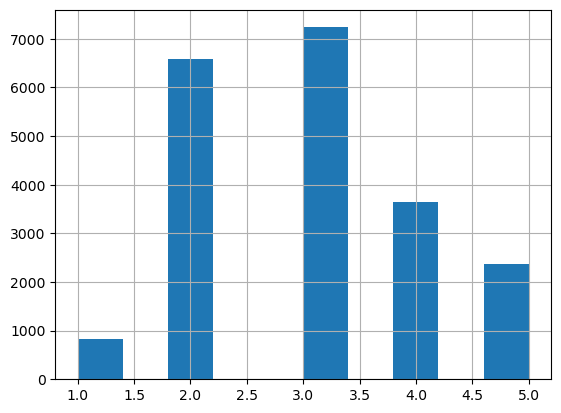

In [20]:
housing_data["income_cat"].hist()

<Axes: >

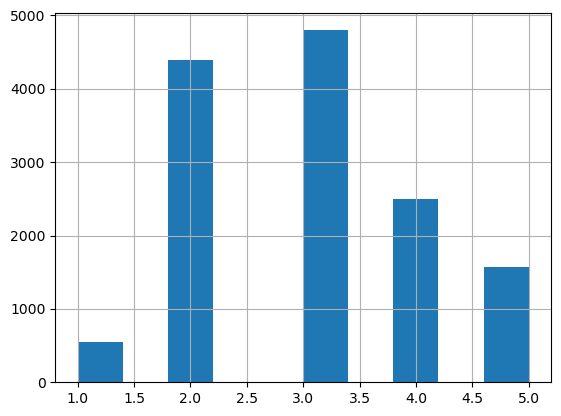

In [21]:
X_train["income_cat"].hist()     # in this case you can see train set is heavily biased and therefore there is huge difference in both histograms

*in order to avoid this biasing, we use stratified sets*

Stratified Split

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

In [23]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [24]:
housing_data["income_cat"].value_counts() / len(housing_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [25]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis='columns', inplace=True)

# visualising our data

*NOTE: Do not visulaise your test data as you need to keep test data as isolated as possibe in order to get the most accurate result while testing*

In [26]:
housing = strat_train_set.copy()      # in our visulaisation we will only be using trained data due to the reason discussed earlier

## Histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

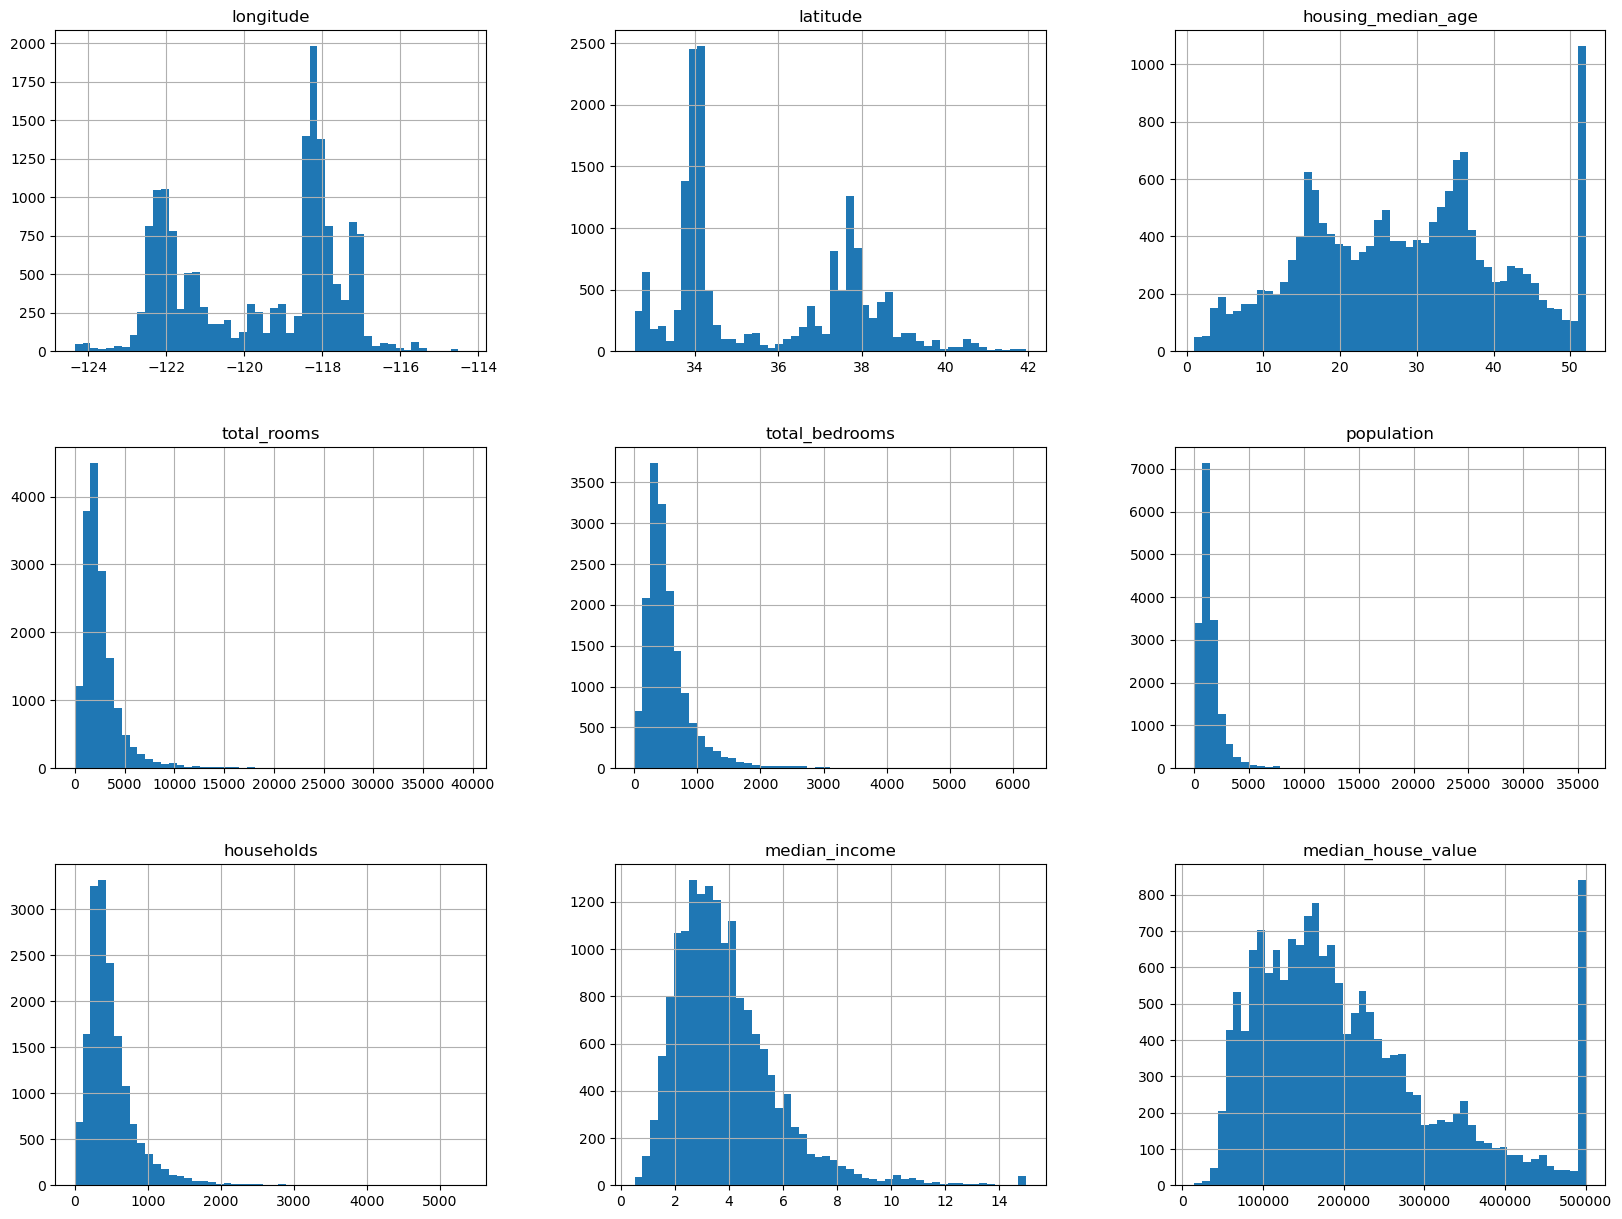

In [27]:
housing.hist(bins=50, figsize=(20,15))

<Axes: >

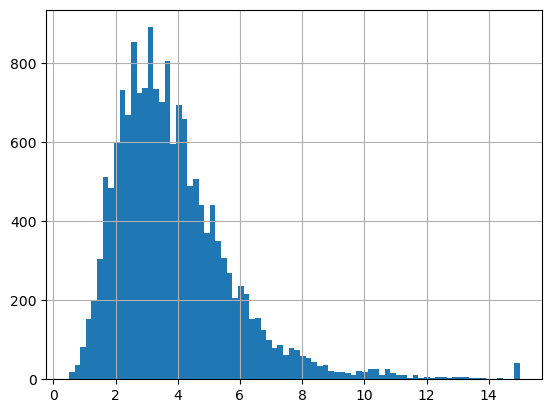

In [28]:
housing["median_income"].hist(bins=80)

## Geographical data

<Axes: xlabel='longitude', ylabel='latitude'>

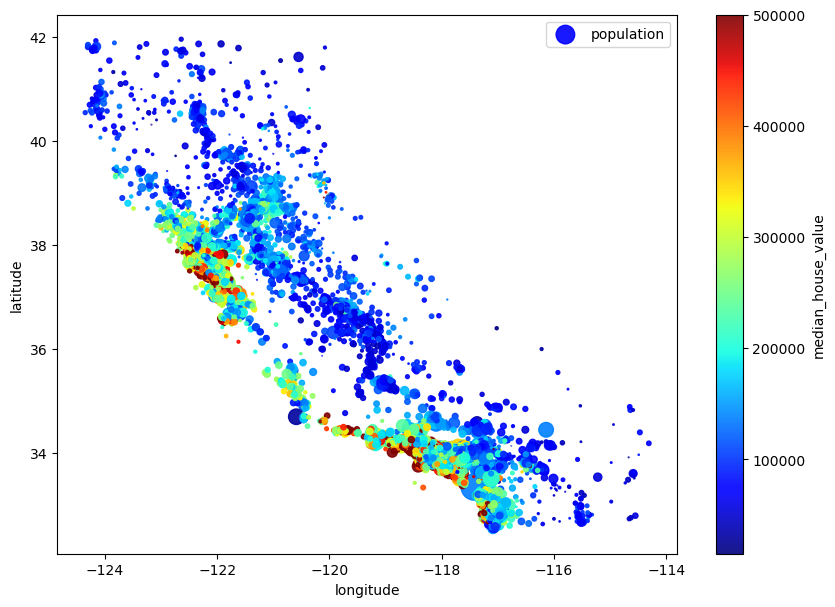

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

# Correlation Matrices

In [30]:
housing.corr()    # Figures out correlation among differnet aspects

C:\Users\loyak\AppData\Local\Temp\ipykernel_13680\3033922635.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()    # Figures out correlation among differnet aspects


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


C:\Users\loyak\AppData\Local\Temp\ipykernel_13680\85235768.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


<Axes: >

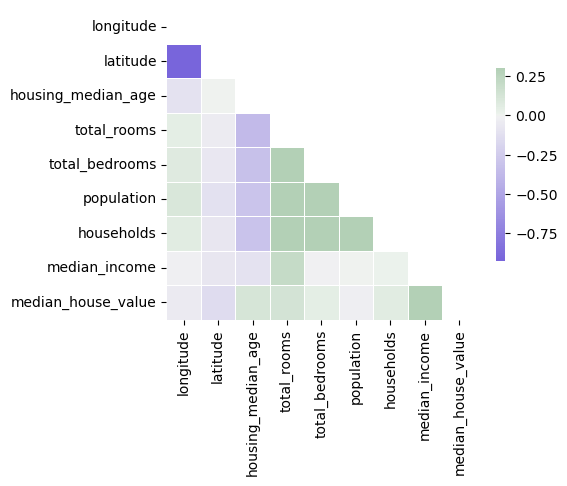

In [31]:
import seaborn as sns

corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(270, 850, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Preparing data for Machine Learning

 - *feature engineering*: Creating new features (columns) out of our raw data using domain knowledge<br>
 - *Imputation*: Inseritng new values where they might be missing to have a complete dataset<br>
 - *Encoding Categorical Variables*: Transforming categorical variables into some numerical variation<br>
 - *scaling*: Applying a scalar that transforms all of our data to same numeric scale 

In [32]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Dealing with missing values (Imputation)

In [33]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [34]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])   #OPTION 1: Drop the datasets with total_bedrooms section as NaN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)    #OPTION 2: drop the whole column

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [36]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)  # OPTION 3: Imputation
sample_incomplete_rows   # 433 is median of total_bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


*Imputation*

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [38]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [40]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [41]:
imputer.strategy

'median'

### Encode Categorical Variables

In [42]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [43]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [44]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot    # creates an array for every dataset and puts 1 for the category it belongs to and 0 for others, this helps keeping it clear to the machine that 1,2,3,4 doesn't mean one is better than another

c:\Users\loyak\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Feature Engineering

In [46]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_bedrooms"] / data["households"]
    return data

In [47]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,1.128895,3.168555,1.128895
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,1.113281,2.623698,1.113281
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,1.033333,2.223333,1.033333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,1.074534,1.859213,1.074534
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,1.113793,3.167241,1.113793
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,1.229770,2.023976,1.229770
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,1.002821,3.363188,1.002821
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.965116,2.662791,0.965116
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,1.157685,2.411178,1.157685


### Scaling our Data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.05896205,
         0.00622264,  0.05896205],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.02830837,
        -0.04081077,  0.02830837],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.1286475 ,
        -0.07537122, -0.1286475 ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.26257303,
        -0.03743619, -0.26257303],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.11548226,
        -0.05915604,  0.11548226],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.05505203,
         0.00657083,  0.05505203]])

# Pipelines

*Pipeline helps us allow different number of transformations one after another*

In [49]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Seperate Lables if they exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)

    else:
        labels=None


    ### Feature Engineering ###

    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)   # creating a list of our features for future use


    ### Imputing Data ###

    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)


    ### Encoding Categorical Data ###

    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")


    ### Scaling Numerical Data ###

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    
    ### Concatening all Data ###

    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [50]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

# Select and Train a Model

In [51]:
train_data, train_labels, features= data_transformations(strat_train_set)
train_data

c:\Users\loyak\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
features    # Just another word for columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [53]:
test_data, test_labels, features= data_transformations(strat_test_set)
test_data

c:\Users\loyak\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[ 0.57507019, -0.69657252,  0.0329564 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.43480141, -0.33466769, -0.36298077, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54522177, -0.63547171,  0.58726843, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08656982, -0.54617051,  1.14158047, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.81385757, -0.92687559,  0.11214383, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.49049967, -0.66367208,  0.58726843, ...,  0.        ,
         0.        ,  0.        ]])

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_data, train_labels)    # Try and learn how data is related to labels

LinearRegression()

In [55]:
original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparision_dataframe = pd.DataFrame(data={"Original_values":original_values, "Predicted_values":predicted_values})

comparision_dataframe["Differences"] = comparision_dataframe["Original_values"] - comparision_dataframe["Predicted_values"]

comparision_dataframe

,Original_values,Predicted_values,Differences
5241,500001.0,420895.994429,79105.005571
17352,162500.0,295576.514018,-133076.514018
3505,204600.0,246124.517091,-41524.517091
7777,159700.0,197275.418859,-37575.418859
14155,184000.0,264247.027195,-80247.027195


In [56]:
from sklearn.metrics import mean_squared_error        # Root mean squared error penalizes large errors

lin_mse = mean_squared_error(original_values, predicted_values)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

81905.73055085902

In [57]:
from sklearn.metrics import mean_absolute_error   # Mean absolute error does not penalize large errors

lin_mae = mean_absolute_error(original_values, predicted_values)

lin_mae

74305.69654699534

## Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)      # Random state defines the randomness of machine choosing datasets, this helps to generate a specific result and not random result evrry time which would make it more specific and ultimately good to use in commercial world
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [59]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

*The zero error above must look like a good sign of an accurate model but no, we are infact overfitting our data which is not a good sign and also it makes no sense that the model is performing with zero error, that's not possible*

### Cross Validation

Instead of just splitting our data into a train and test set and training once, we can do something called *K-Fold Cross-Validation* which will split our dataset into 10 folds (sections) training on 9 of the sections and testing on the last one. It does this for all of the folds which can let us more rigorously evaluate the model.

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72749.92596814 71034.87981466 70463.7852158  72392.71486916
 70297.97933199 73768.18498505 73081.83436504 70627.7066113
 67519.67418982 71840.48361506]
Mean: 71377.71689660198
Standard deviation: 1712.055379649966


*Now you can see above error is higher than the earlier result(error was zero there), this is more precise way of finding out the error*

## Random Forest Regressor

*Basically bunch of decision tree regressor run one after the another*

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [63]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18982.692534443137

*error of 71000 dropped to almost 19000!! That's a significantly efficient model*

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [52355.83399399 50311.79108775 47022.5018068  52619.83936913
 48713.3261903  51031.93909712 53442.08433113 50479.22850811
 48335.31198059 54887.65849821]
Mean: 50919.951486315134
Standard deviation: 2331.770529531794


In [65]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69107.207182
std       2575.402097
min      64335.866671
25%      67443.405957
50%      69108.519620
75%      70461.080147
max      72903.126374
dtype: float64

## Fine-Tuning the model 

After you pick a model or set of models that are promising, you'll neeed to fine-tune the hyperparameters (paramteres of the model that aren't affected by training) in order to find the best ones to use for your model. You can use something called grid Search in order to accomplish this.

### Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12(3x4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # now try 6(2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
    ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [70]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66724.70693119305 {'max_features': 2, 'n_estimators': 3}
56440.70284394085 {'max_features': 2, 'n_estimators': 10}
54218.96314353607 {'max_features': 2, 'n_estimators': 30}
61184.246557047285 {'max_features': 4, 'n_estimators': 3}
53313.59127532722 {'max_features': 4, 'n_estimators': 10}
50548.67199811354 {'max_features': 4, 'n_estimators': 30}
57724.73387353921 {'max_features': 6, 'n_estimators': 3}
52088.098615966046 {'max_features': 6, 'n_estimators': 10}
49992.45851601486 {'max_features': 6, 'n_estimators': 30}
59260.73212163465 {'max_features': 8, 'n_estimators': 3}
52964.23585263911 {'max_features': 8, 'n_estimators': 10}
50156.82709830421 {'max_features': 8, 'n_estimators': 30}
63515.22833743157 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55284.85203879524 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59934.40585830574 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52967.07250942228 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [71]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.175658,0.020658,0.006973,0.001663,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.142720e+09,-4.154659e+09,...,-4.452187e+09,2.899036e+08,18,-1.198160e+09,-1.192646e+09,-1.209478e+09,-1.160515e+09,-1.274113e+09,-1.206982e+09,3.729679e+07
1,0.662430,0.095504,0.018761,0.006026,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.088073e+09,-3.140135e+09,...,-3.185553e+09,7.851859e+07,11,-5.866428e+08,-6.269056e+08,-5.994974e+08,-6.053432e+08,-6.335251e+08,-6.103828e+08,1.741289e+07
2,1.500138,0.080185,0.035615,0.000711,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.877830e+09,-2.815141e+09,...,-2.939696e+09,1.208463e+08,9,-4.490051e+08,-4.508040e+08,-4.465513e+08,-4.483724e+08,-4.672172e+08,-4.523900e+08,7.537233e+06
3,0.217261,0.006828,0.005388,0.001739,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.822407e+09,-3.463747e+09,...,-3.743512e+09,2.012453e+08,16,-1.030934e+09,-1.016868e+09,-1.026088e+09,-9.900917e+08,-9.838614e+08,-1.009569e+09,1.909381e+07
4,0.781784,0.046155,0.012803,0.002125,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.787326e+09,-2.726228e+09,...,-2.842339e+09,1.268496e+08,8,-5.299518e+08,-5.508371e+08,-5.345190e+08,-5.527750e+08,-5.335993e+08,-5.403364e+08,9.508458e+06
5,2.934206,0.340053,0.040762,0.003876,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.561374e+09,-2.420016e+09,...,-2.555168e+09,1.074987e+08,3,-3.881779e+08,-3.989670e+08,-3.964063e+08,-3.922779e+08,-3.952975e+08,-3.942253e+08,3.708180e+06
6,0.321029,0.026334,0.005911,0.001916,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.443585e+09,-3.048933e+09,...,-3.332145e+09,1.582965e+08,12,-9.146871e+08,-9.102525e+08,-9.600244e+08,-8.853850e+08,-8.736431e+08,-9.087984e+08,2.981602e+07
7,1.247554,0.094141,0.014235,0.003523,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.715073e+09,-2.521838e+09,...,-2.713170e+09,1.226316e+08,4,-4.910971e+08,-4.998575e+08,-5.225298e+08,-5.085892e+08,-4.994618e+08,-5.043071e+08,1.066004e+07
8,4.033889,0.571520,0.042488,0.006366,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.516898e+09,-2.379789e+09,...,-2.499246e+09,1.059697e+08,1,-3.700325e+08,-3.887935e+08,-3.892166e+08,-3.737889e+08,-3.807970e+08,-3.805257e+08,7.738909e+06
9,0.574154,0.100035,0.005564,0.001553,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.595683e+09,-3.420349e+09,...,-3.511834e+09,6.430770e+07,13,-9.429488e+08,-9.087075e+08,-9.272026e+08,-8.897495e+08,-8.866692e+08,-9.110555e+08,2.159658e+07


### Randomized Search

Randomized search allows you to more easily find the hyperparameters that we're interested in because instead of searching through all possible combinations, it randomly picks a couple and tries those out.

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E9C94C090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024E9C94F610>},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
cvres= rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49208.447437906274 {'max_features': 7, 'n_estimators': 180}
51838.93548582192 {'max_features': 5, 'n_estimators': 15}
50956.47297819288 {'max_features': 3, 'n_estimators': 72}
51064.09638970543 {'max_features': 5, 'n_estimators': 21}
49338.00463983924 {'max_features': 7, 'n_estimators': 122}
50954.32667145372 {'max_features': 3, 'n_estimators': 75}
50811.58141850946 {'max_features': 3, 'n_estimators': 88}
49598.03867989891 {'max_features': 5, 'n_estimators': 100}
50611.79222816137 {'max_features': 3, 'n_estimators': 150}
64381.22896857062 {'max_features': 5, 'n_estimators': 2}


In [76]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,16.980351,2.779015,0.159693,0.027266,7,180,"{'max_features': 7, 'n_estimators': 180}",-2.465276e+09,-2.291145e+09,-2.331350e+09,-2.501358e+09,-2.518228e+09,-2.421471e+09,9.248716e+07,1
1,1.033973,0.047864,0.014065,0.001308,5,15,"{'max_features': 5, 'n_estimators': 15}",-2.701209e+09,-2.571387e+09,-2.574654e+09,-2.744115e+09,-2.845012e+09,-2.687275e+09,1.043259e+08,9
2,3.199807,0.165199,0.058526,0.009440,3,72,"{'max_features': 3, 'n_estimators': 72}",-2.611586e+09,-2.477812e+09,-2.532587e+09,-2.625083e+09,-2.735743e+09,-2.596562e+09,8.786912e+07,7
3,1.273319,0.022439,0.024289,0.013114,5,21,"{'max_features': 5, 'n_estimators': 21}",-2.652986e+09,-2.499394e+09,-2.471911e+09,-2.662804e+09,-2.750615e+09,-2.607542e+09,1.055282e+08,8
4,10.253688,0.272367,0.088305,0.002324,7,122,"{'max_features': 7, 'n_estimators': 122}",-2.473830e+09,-2.298031e+09,-2.347338e+09,-2.516714e+09,-2.535281e+09,-2.434239e+09,9.453412e+07,2
5,3.110920,0.029293,0.056592,0.006312,3,75,"{'max_features': 3, 'n_estimators': 75}",-2.616527e+09,-2.476520e+09,-2.533856e+09,-2.619399e+09,-2.735415e+09,-2.596343e+09,8.779745e+07,6
6,3.611120,0.187643,0.062644,0.002275,3,88,"{'max_features': 3, 'n_estimators': 88}",-2.604091e+09,-2.452569e+09,-2.520775e+09,-2.614980e+09,-2.716668e+09,-2.581817e+09,8.967917e+07,5
7,6.177804,0.172413,0.074499,0.003248,5,100,"{'max_features': 5, 'n_estimators': 100}",-2.492720e+09,-2.342274e+09,-2.362996e+09,-2.541595e+09,-2.560242e+09,-2.459965e+09,9.060444e+07,3
8,6.858287,0.365142,0.125481,0.011552,3,150,"{'max_features': 3, 'n_estimators': 150}",-2.596427e+09,-2.424080e+09,-2.489376e+09,-2.615508e+09,-2.682377e+09,-2.561554e+09,9.255735e+07,4
9,0.146617,0.012746,0.002896,0.000663,5,2,"{'max_features': 5, 'n_estimators': 2}",-4.015117e+09,-4.028909e+09,-4.025432e+09,-4.229860e+09,-4.425395e+09,-4.144943e+09,1.615338e+08,10


In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.31091180e-02, 7.51701952e-02, 4.18859736e-02, 2.63107764e-02,
       1.86313404e-02, 2.19401384e-02, 1.72186663e-02, 4.01177507e-01,
       1.94672720e-02, 1.06076677e-01, 1.94570946e-02, 1.97627197e-02,
       1.37285112e-01, 6.47434592e-05, 5.48308608e-03, 6.95958020e-03])

### Feature Importance List

Judging the importances of various features is very important as this allows us to explain to our stackholders which feature is most important and why which is becoming more important as more advanced models behave like blackboxes.

In [80]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.08310911795359528),
 ('latitude', 0.07517019517434881),
 ('housing_median_age', 0.04188597363813573),
 ('total_rooms', 0.02631077642167352),
 ('total_bedrooms', 0.018631340368814194),
 ('population', 0.021940138390354347),
 ('households', 0.017218666292362156),
 ('median_income', 0.4011775072690654),
 ('bedrooms_per_household', 0.019467272028133607),
 ('population_per_household', 0.10607667652820285),
 ('rooms_per_household', 0.01945709457454961),
 ('<1H OCEAN', 0.019762719714525975),
 ('INLAND', 0.13728511190260895),
 ('ISLAND', 6.474345922893847e-05),
 ('NEAR BAY', 0.005483086082079367),
 ('NEAR OCEAN', 0.0069595802023211225)]

<BarContainer object of 16 artists>

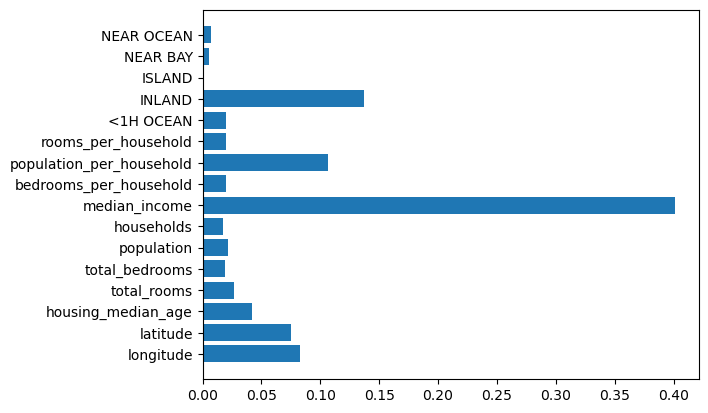

In [81]:
plt.barh(y=features, width=feature_importances.tolist())

In [82]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [83]:
final_rmse

62901.36366903385